For this Lab, I collected 6 datasets.
First two data sets are MSIS curriculum page and skills scraped from a PDF published by Monster.com. These two are <b>integrated</b> into one data set specifys the skills MSIS program needs.


Antother four data sets are a list of NASDAQ stocks, a list of NYSE stocks, a list of Fortune 500 and a list contains 150 silicone valley compaines. These four <b>integrate </b> into one data sets specify out of 150 valley companies, how many are NASDAQ listed, NYSE listed or on the list for fortune 500.

### Road Map for  Claim 1
(Data) Key words on MSIS curriculum page matched up  with skills scraped from a PDF published by Monster.com.(Claim) MSIS program offers skills that the (Qualifier) local job Market needs. (Warrant) Since we can offer what the job markets need most, our program would be very appealing to students and recuriter. (Backing) References stating the more matched skills the program offers, the more students are recruited.(Reservation/Rebuttal) Some most needed skills are not poped up on the program curriculum page.

### Road Map for  Claim 2
(Data) 150 silicone valley companies, a list of NASDAQ stocks, a list of NYSE stocks, a list of Fortune 500. (Claim) SCU MSIS program graduates has an relative esaier way to get a very good job.(Warrant) More companies will render more opportunies for job seekers. And silicone valley has more companies than anywhere else in the country.(Backing) Reference stating that students study in the valley do get jobs easier than other areas.(Reservation/Rebuttal) Top ranking schools students who are not in the bay area also get jobs easier.

### First bar chart  claims  MSIS program offers skills that the job Market needs.

Advantages: Clearly shows some of the skills offered in MSIS are what the job market need.

Disadvantages: Not enough skills nor not enough words to represent a strong relationship

If possible, I would like to have a list contains all the technical terms we have in MSIS and more skills that are needed on the job market

Populating the interactive namespace from numpy and matplotlib


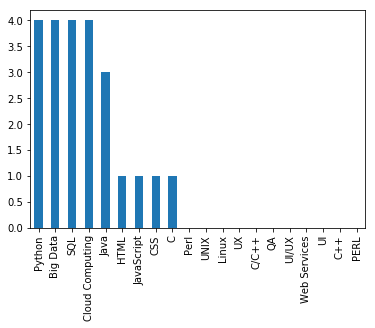

In [806]:
%pylab inline
skillCount.plot(kind = 'bar')

### Second chart claims students enrolled will have the convience of being a few blocks away from these companies. Therefore more job opportunitues.

Advantages:  It's clear that out of only 150 companies, over 120 companies are in the stock market and some are even on the fortune 500 list

Disadvantages: Companies number is not big enough to make a strong argument to all companies are attractive

If possible, I would like to collect all companies in the valley and make the comparison again. 

Populating the interactive namespace from numpy and matplotlib


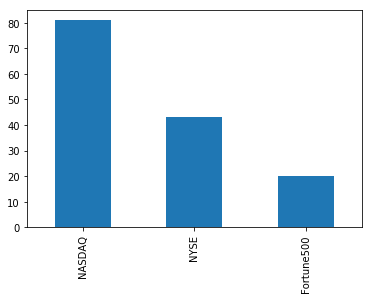

In [796]:
%pylab inline
result.plot(kind = 'bar')

Data Wrangling down below

#### From this cell on is for the first chart until state otherwise

In [407]:
from urllib.request import urlopen 
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd

To get both course titles and descriptions, we find the CSS selector "panel-group"

![title](webScrpingTag.jpeg)

In [777]:
# These follwoing lines read a dynamic webpage
driver = webdriver.PhantomJS(executable_path='/Users/Meiyuan/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs') 
driver.get("https://www.scu.edu/business/ms-information-systems/curriculum/msis-courses/")  
time.sleep(3) # Sleep 3 seconds for the driver to load js page 
print (driver.find_element_by_css_selector('div.panel-group').text) 
driver.close()

2601 : Object-Oriented Analysis and Programming
2602 : Information Systems Analysis & Design
2603 : Database Management Systems
2604 : Information Systems Policy and Strategy
2605 : Telecommunications & Business Networks
2606 : Software Project Management
2621 : Business Intelligence & Data Warehousing
2622 : ERP Systems
2623 : Financial Information Systems
2624 : E-Business Technologies: Virtualization and Cloud Computing
2627 : Big Data Modeling and Analytics
2628 : The Business of Cloud Computing
2629 : Dashboards, Scorecards and Visualization
2630 : Web Programming
2640 : Capstone Project Proposal
2641 : Information Technology: Ethics and Public Policy
2642 : Capstone Project I
2643 : Capstone Project II
2644 : MSIS Master's Thesis
2645 : Capstone Design Proposal
2646 : Capstone Design Project I
2647 : Capstone Design Project II
2797 : Curricular Practicum Education
2798 : Extended Curricular Practicum Education
2801 : Mobile Payment and e_Commerce Security
2802 : Data Science Anal

Unfortunatley, the course description is written in CSS pseudo elements, we have to find another way to extract them

Use BeautifulSoup to parse the non-dynamic version of the above saved page 

In [651]:
titleAndDesc = bsObj.find('div', {"class":"panel-group"}).getText().strip()

In [650]:
bsObj = BeautifulSoup(open("MSIS.html",encoding='utf-8'), 'html.parser') 
print (bsObj.h1) # test to see whether it has the right page or not

<h1><span></span>MS in Information Systems</h1>


In [652]:
titleAndDesc[:300] # Output is a very long string.Preview of the course titles and descriptions.

'2601 : Object-Oriented Analysis and Programming\n\n\n\nProvides students with advanced topics in object-oriented programming methodology. Instructor will present different programming paradigms and discuss object-oriented programming concepts including principles of data abstraction, inheritance, polymo'

Remove new line characters and split the long string for later use

In [240]:
import re

In [661]:
titleAndDesc = re.sub('[\n]+','   ', titleAndDesc)

In [662]:
titleAndDesc[:300]

'2601 : Object-Oriented Analysis and Programming   Provides students with advanced topics in object-oriented programming methodology. Instructor will present different programming paradigms and discuss object-oriented programming concepts including principles of data abstraction, inheritance, polymor'

Extract the most-needed tech skills form a PDF published by Monster.com.  
The name is <b> Local Market Overview -- Silicon Valley </b>

In this 29-page PDF file, two pages (19 and 29) present 30 skills in total. Some of them are identical, so we need to make a list only has unqiue skills.

![title](combined2.jpg)

In [87]:
from urllib.request import urlopen 
from pdfminer.pdfinterp import PDFResourceManager, process_pdf 
from pdfminer.converter import TextConverter 
from pdfminer.layout import LAParams 
from io import StringIO 
from io import open

In [208]:
# Read PDF in and convert it to a string
def readPDF(pdfFile):

    rsrcmgr = PDFResourceManager() 
    retstr = StringIO() 
    laparams = LAParams() 
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)

    process_pdf(rsrcmgr, device, pdfFile) 
    device.close()

    content = retstr.getvalue() 
    retstr.close() 
    return content

In [209]:
pdfFile = urlopen("https://media.newjobs.com/a/i/intelligence/Silicon-Valley-Monster-Local-Market-Overview_JUN2016.pdf") 
outputString = readPDF(pdfFile) 
pdfFile.close()

Remove new line character, unicode character and dot

In [210]:
output1stClean = outputString.replace('\n',' ').replace('\x0c',' ').replace('•',' ')

Split it with two spaces becasuse some the skills we want are delimited with one space.
Using one will break them up.

In [211]:
outputSlited = output1stClean.split('  ')

Remove the leading and trailing spaces for every tiem in the list and drop the empty items

In [779]:
outputStripped = []
for item in outputSlited:
    if item != '':
        outputStripped.append(item.strip())

In [780]:
outputStripped[:10]

['Local Market',
 'Overview --',
 'Silicon Valley',
 'PRESENTED BY:',
 'Global Market Insights',
 'June 2016',
 'Silicon Valley Employment Snapshot',
 '1.1M',
 '40K',
 '3.7%']

Top15 skills are on page number '19' so extrct the skills by this criteria.
If it has more than one '19' in the list, post-processing or other criteria are needed.

In [311]:
top15Skills = []

In [312]:
for x in range(len(outputStripped)):
    if outputStripped[x] == '19':
        for y in range(15):
            top15Skills.append(outputStripped[x+y+1])

In [313]:
top15Skills

['CSS',
 'HTML',
 'JavaScript',
 'UI',
 'Web Services',
 'Java',
 'QA',
 'SQL',
 'UX',
 'Python',
 'UNIX',
 'Big Data',
 'Perl',
 'Linux',
 'C/C++']

Key tech skills on page 29 are after a page number '29' in the list so extrct the skills by this criteria.
If it has more than one '19' in the list, post-processing or other criteria are needed.

In [657]:
keyTechSkills = []

In [658]:
for x in range(len(outputStripped)):
    if outputStripped[x] == '29':
        for y in range(15):
            keyTechSkills.append(outputStripped[x+y+1])

In [659]:
keyTechSkills = keyTechSkills[-15:-1] # Post processing to get the correct 15 itmes

In [660]:
keyTechSkills

['Java',
 'SQL',
 'Linux',
 'HTML',
 'UI/UX',
 'UNIX',
 'C',
 'C++',
 'JavaScript',
 'CSS',
 'Cloud Computing',
 'PERL',
 'Python',
 'Web Services']

Merge two lists

In [315]:
top15Skills.extend(keyTechSkills)

Create a set

In [316]:
skillSet = (top15Skills)

In [317]:
skillSet

['CSS',
 'HTML',
 'JavaScript',
 'UI',
 'Web Services',
 'Java',
 'QA',
 'SQL',
 'UX',
 'Python',
 'UNIX',
 'Big Data',
 'Perl',
 'Linux',
 'C/C++',
 'Java',
 'SQL',
 'Linux',
 'HTML',
 'UI/UX',
 'UNIX',
 'C',
 'C++',
 'JavaScript',
 'CSS',
 'Cloud Computing',
 'PERL',
 'Python']

In [663]:
skillCount = {}

In [664]:
for skill in skillSet:
    skillCount[skill] = titleAndDesc.count(skill)

In [665]:
skillCount

{'Big Data': 4,
 'C': 53,
 'C++': 0,
 'C/C++': 0,
 'CSS': 1,
 'Cloud Computing': 4,
 'HTML': 1,
 'Java': 3,
 'JavaScript': 1,
 'Linux': 0,
 'PERL': 0,
 'Perl': 0,
 'Python': 4,
 'QA': 0,
 'SQL': 4,
 'UI': 0,
 'UI/UX': 0,
 'UNIX': 0,
 'UX': 0,
 'Web Services': 0}

Speical handling of skill 'C' to get the correct number 

In [666]:
skillCount['C'] = titleAndDesc.count(' '+ 'C'+' ')

In [667]:
skillCount

{'Big Data': 4,
 'C': 1,
 'C++': 0,
 'C/C++': 0,
 'CSS': 1,
 'Cloud Computing': 4,
 'HTML': 1,
 'Java': 3,
 'JavaScript': 1,
 'Linux': 0,
 'PERL': 0,
 'Perl': 0,
 'Python': 4,
 'QA': 0,
 'SQL': 4,
 'UI': 0,
 'UI/UX': 0,
 'UNIX': 0,
 'UX': 0,
 'Web Services': 0}

Turn it into a Series

In [792]:
skillCount = pd.Series(skillCount, index = skillCount.keys()).sort_values(ascending = False)

Populating the interactive namespace from numpy and matplotlib


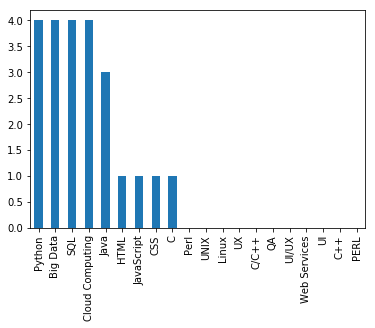

In [793]:
%pylab inline
skillCount.plot(kind = 'bar')

#### Down below is for the secind chart until state otherwise

Below will present how present out of 150 silicon valley companies, how many are NYSE listed, NASDAQ listed and on the list of Fortune 500 in 2017.

In [673]:
pdfFile = open("2017-Silicon-Valley-150.pdf", 'rb')
outputString = readPDF(pdfFile)
pdfFile.close()

Remove new lines

In [674]:
output = re.sub('\n',' ', outputString)

In [676]:
output[:100]

'2016 2015   rank  rank   End  Last four  quarter quarters % chg   Last four   Proﬁt/ quarters Rank  '

We want to extract the red part

![title](CompanyNames2.jpeg)

Data Wrangling for us to get the 150 names

In [679]:
outlist = re.split('[  ]\d+[ ]', output)

In [690]:
len(outlist) # huge number becuase it contains a lot of empty strings

1046

Intermediate list to hold all non-empty ngrams produced from the original long string

In [736]:
interMList = []

In [737]:
# Not only extract the non-empty list, leading and trailing spaces are removed
for x in range(len(outlist)):
    if outlist[x] != '':
        interMList.append(outlist[x].strip())

In [738]:
len(interMList) # shorter list

485

In [781]:
companyList = [] # Hold the 150 companies

In [782]:
# First company starts with '8x8' then we extract the following 149 names
for x in range(len(interMList)):
    if interMList[x] == '8x8':
        for y in range(150):
            companyList.append(interMList[x+y])

In [783]:
companyList[:5]

['8x8', 'A10 Networks', 'Abaxis', 'Accuray', 'Adobe Systems']

In [784]:
len(companyList)

150

In [700]:
companyList = pd.Series(companyList) # Create a Series based on it

In [701]:
companyList.to_csv('svcompanies.csv') # Save the company list

From now on we read a fortune 500 company list, a NYSE stock list and a NASDAQ stock list

In [702]:
fortune500df = pd.read_csv('Fortune500US.csv')

In [703]:
fortune500df.columns = ['Rank','Name']

In [706]:
fortune500df[:5]

,Rank,Name
0,1,Walmart
1,2,Berkshire Hathaway
2,3,Apple
3,4,Exxon Mobil
4,5,McKesson


In [704]:
fortune500String = ' '.join(fortune500df.Name.tolist()) # concatenate the long list to a string for later processing

Nasdaq List

In [489]:
nasdaqdf = pd.read_csv('NASDAQcompanylist.csv')

In [705]:
nasdaqdf[:5] # Notice names of this list has post-fix 'Inc.' or 'Corp.

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,PIH,"1347 Property Insurance Holdings, Inc.",7.6838,4.577060e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
1,TURN,180 Degree Capital Corp.,1.8737,5.831247e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
2,FLWS,"1-800 FLOWERS.COM, Inc.",9.95,6.455454e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN
3,FCCY,1st Constitution Bancorp (NJ),17.85,1.440365e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN
4,SRCE,1st Source Corporation,52.08,1.350712e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN


In [708]:
nasdaqString = ' '.join(nasdaqdf.Name.tolist())

NYSE list

In [491]:
nysedf = pd.read_csv('NYSEcompanylist.csv')

In [492]:
nysedf[:5]

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,DDD,3D Systems Corporation,12.68,1.442987e+09,n/a,n/a,Technology,Computer Software: Prepackaged Software,http://www.nasdaq.com/symbol/ddd,NaN
1,MMM,3M Company,216.75,1.293493e+11,n/a,n/a,Health Care,Medical/Dental Instruments,http://www.nasdaq.com/symbol/mmm,NaN
2,WBAI,500.com Limited,11.29,4.602664e+08,n/a,2013,Consumer Services,Services-Misc. Amusement & Recreation,http://www.nasdaq.com/symbol/wbai,NaN
3,WUBA,58.com Inc.,64.41,9.376452e+09,n/a,2013,Technology,"Computer Software: Programming, Data Processing",http://www.nasdaq.com/symbol/wuba,NaN
4,AHC,A.H. Belo Corporation,4.5,9.788925e+07,n/a,n/a,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/ahc,NaN


In [496]:
nyseString = ' '.join(nysedf.Name.tolist())

Put names into different buckes

In [765]:
NYSE = []
NASDAQ = []
Fortune500 = []

In [766]:
for company in companyList:
    if company in nyseString:
        NYSE.append(company)
    if company in nasdaqString:
        NASDAQ.append(company)
    if company in fortune500String:
        Fortune500.append(company)

In [767]:
NYSE[:5]

['A10 Networks',
 'Aerohive Networks',
 'Agilent Technologies',
 'Apple',
 'Arista Networks']

Create a dict to present the name and number

In [768]:
valueCountDict = {'NYSE':len(NYSE), 'NASDAQ':len(NASDAQ), 'Fortune500':len(Fortune500)}

In [769]:
valueCountDict

{'Fortune500': 20, 'NASDAQ': 81, 'NYSE': 43}

In [794]:
result = pd.Series(valueCountDict, index = ['Fortune500','NASDAQ','NYSE']).sort_values(ascending = False)

Show the preliminary result

In [795]:
import matplotlib

Populating the interactive namespace from numpy and matplotlib


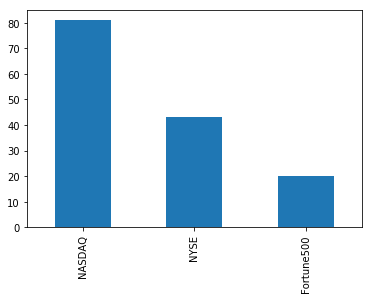

In [796]:
%pylab inline
result.plot(kind = 'bar')

In [773]:
result.to_csv('result.csv') # Save the result

Following steps will create dataframe which has company, 'NYSE Listed', 'NASDAQ Listed' and 'Fortune 500' as its columns

In [585]:
companydf = pd.DataFrame(companyList, columns = ['Name'])

In [586]:
companydf.index = companydf.Name

In [587]:
companydf[:5]

,Name
Name,
8x8,8x8
A10 Networks,A10 Networks
Abaxis,Abaxis
Accuray,Accuray
Adobe Systems,Adobe Systems


In [588]:
companydf['NYSE Listed'] = 0

In [589]:
companydf['NASDAQ Listed'] = 0

In [590]:
companydf['Fortune 500'] = 0

Assign Value 

In [592]:
for company in companyList:
    if company in nyseString:
        companydf.loc[company,'NYSE Listed'] = 1
    if company in nasdaqString:
        companydf.loc[company,'NASDAQ Listed'] = 1
    if company in fortune500String:
        companydf.loc[company,'Fortune 500'] = 1

In [594]:
companydf.index = range(150)

In [785]:
companydf[:10]

,Name,NYSE Listed,NASDAQ Listed,Fortune 500
0,8x8,0,1,0
1,A10 Networks,1,0,0
2,Abaxis,0,0,0
3,Accuray,0,1,0
4,Adobe Systems,0,1,1
5,Advanced Micro Devices,0,1,0
6,Aemetis,0,1,0
7,Aerohive Networks,1,0,0
8,Agilent Technologies,1,0,0
9,Align Technology,0,1,0


In [596]:
companydf.to_csv('company.csv')